In [1]:
!pip install pyaudio matplotlib

In [2]:
import pyaudio
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
for i in range(0, numdevices):
    if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
        print("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))


Input Device id  0  -  Microsoft Sound Mapper - Input
Input Device id  1  -  Microphone Array (Realtek(R) Au
Input Device id  2  -  Stereo Mix (Realtek(R) Audio)


In [3]:
pip install --upgrade pyaudio


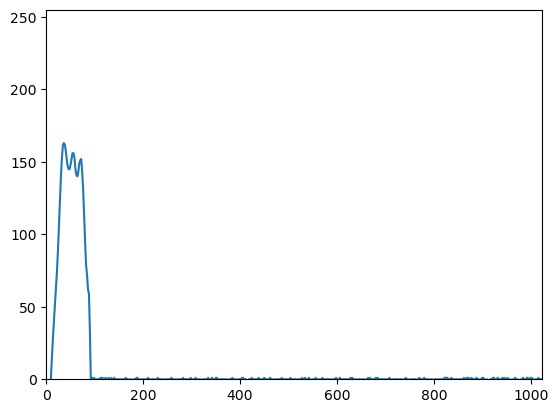

In [ ]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Inisialisasi PyAudio
p = pyaudio.PyAudio()

# Konfigurasi
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024

# Buat objek PyAudio Stream
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

# Buat plot
fig, ax = plt.subplots()
x = np.arange(0, 2 * CHUNK, 2)
line, = ax.plot(x, np.random.rand(CHUNK))

ax.set_ylim(0, 255)
ax.set_xlim(0, CHUNK)

while True:
    try:
        # Baca data audio
        data = stream.read(CHUNK)
        data_np = np.frombuffer(data, dtype=np.int16)

        # Update plot
        line.set_ydata(data_np)
        clear_output(wait=True)
        display(fig)

    except KeyboardInterrupt:
        break

# Tutup stream dan PyAudio
stream.stop_stream()
stream.close()
p.terminate()
